# Fundamentals of Deep Learning -  Playground

🧠 Welcome to this module of Deep Learning!

🎯 In this challenge, our goal is two-fold:
1. Get a visual representation of Neural Networks
2. Build a better intuition of what Neural Networks are doing

👉 We will use ***[Tensorflow Playground](https://playground.tensorflow.org/)***

_(This first challenge does not require much coding_)

## Classification in Deep Learning

### (1) The data

❓ Let's go to the [Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2&seed=0.23545&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&showTestData_hide=false&stepButton_hide=false&activation_hide=false&problem_hide=false&batchSize_hide=true&dataset_hide=false&resetButton_hide=false&discretize_hide=false&playButton_hide=false&learningRate_hide=true&regularizationRate_hide=true&percTrainData_hide=false&numHiddenLayers_hide=false) and select the following type of data ❓

- A classification problem
- The circle dataset (<span style="color:blue">blue dots</span> inside a circle of <span style="color:orange">orange dots</span>)
- Ratio of training to test data : $ 70 \% $
- No noise ($ = 0$)
- Do not show test data (right panel)
- Do not discretize the output
- Activation function: ***ReLU***

<details>
    <summary><i> Why Relu? </i></summary>
        
💡 In general, try it by default. It appears to work better for many problems!
    
_Note: Playground only allows you to select **one** activation function that is used for **all** of the **hidden** layers_

</details>

### (2) The features

❓ <u>Questions about the features</u> ❓

1. Select only the features $X_1$ and $X_2$ (_unselect the other features if necessary_)
2. If you were using the other variables such as $X_1^{2}$, $X_2^{2}$, $X_1 X_2$, $sin(X_1)$ and $sin(X_2)$, what type of classic Machine Learning operation does it correspond to?

> Feature engineering

<details>
    <summary><i>Answer</i></summary>

* It corresponds to some type of ***feature engineering*** where you transform them.
    * <i>Examples: multiplication, sinus, square, ...</i>
* Here, in this exercise but also tomorrow, we will only use the raw input features $X_1$ and $X_2$.
</details>



### (3) Building and Fitting a Neural Network in ***Playground***

❓ <u>Questions about Neural Networks</u> ❓

* 🧠 Build a model with the following architecture:
    - three hidden layers
    - 5 neurons on the first hidden layer
    - 4 neurons on the second hidden layer
    - 3 neurons on the last hidden layer
    - In ***Playground***, the output layer is not represented:
        - For such binary classification task, keep in mind that it will automatically be a dense layer with 1 neuron activated by the sigmoid function $ \large \phi(z) = \frac{1}{1 + e^{-z}} $

* 💪 ***Fit it and stop the iterations when the loss function has stabilized.***

* 👀 Observe carefully:
    - Look at the individual neurons and try to understand what each neuron has specialized for during the _.fit()_
    - What do you think about the overall shape your results? Re-run the neural network with different activation functions to compare. Can you make it work with "Linear"?

<details>
    <summary>Answer: some insights about the activation functions</summary>

- Results may look like a hexagon because ReLu is piece-wise linear!
- A non-linearly separable problem cannot be fitted with a linear activation such as **Linear**
- Surprisingly, a piece-wise linear activation function such as **ReLu** (or **LeakyReLu**) fits this non-linearly separable problem well (even if that is not always true)
- The `tanh` activation gives a "smoother" decision boundary
- The **sigmoid** does **not** seem to work well here.
    
🧑🏻‍🏫 Always start with ReLu, it's a safe bet 🧑🏻‍🏫!
</details>



### (4) Building and Fitting a Neural Network in ***Tensorflow.Keras***

👇 We wrote the same model for you - at least the architecture - in Tensorflow's Keras

In [2]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Dense(5, activation='relu', input_dim=2)) # 1st hidden layer with 5 neurons
model.add(layers.Dense(4, activation='relu')) # 2nd hidden layer with 4 neurons
model.add(layers.Dense(3, activation='relu')) # 3rd hidden layer with 3 neurons



model.add(layers.Dense(1, activation='sigmoid')) # Output layer that outputs a probability of belonging
                                                 # to the class of "success"


<details>
    <summary><i>What to understand about the code of a Neural Network? </i>👆</summary>

- <u>First Hidden Layer a.k.a ***Input Layer***</u>:
    - Every datapoint that will be input to the neural network has two features $ X = \begin{bmatrix}
           X_{1} \\
           X_{2} \\
         \end{bmatrix} $.
    - You need to inform your Neural Network about the ***number of input features*** through the ***`input_dim` argument***
    - A Neural Network tries to mimic the human brain. Here we would like to use 5 neurons to start analyzing each of these points.
    
    - Every datapoint goes through the first hidden layer which was built using 5 neurons $ layer_1 = \begin{bmatrix}
           a_{1} \\
           a_{2} \\
           a_{3} \\
           a_{4} \\
           a_{5} \\           
         \end{bmatrix} $
    
 - <u>Second Hidden Layer</u>:
         
    - What if we want to ***make the information flow*** through a second hidden layer with 4 neurons? It is totally possible!
    - These 4 neurons $ layer_2 = \begin{bmatrix}
           b_{1} \\
           b_{2} \\
           b_{3} \\
           b_{4} \\
         \end{bmatrix} $ from the second layer will analyze the output from the 5 neurons in the first layer
    
- <u>Third Hidden Layer</u>:
        - What if we want the information to **continue to flow** through a third hidden layer with 3 neurons? Again, totally possible!

    - Every neuron's output from the second layer goes through the third hidden layer which was built using 3 neurons $ layer_3 = \begin{bmatrix}
           c_{1} \\
           c_{2} \\
           c_{3}
         \end{bmatrix} $
         
    - These 3 neurons analyze the outputs of the neurons in $ layer_2  $ !

- <u>Predictive Layer</u>
    - You are dealing with a binary classification task
    - We could use two neurons to predict the probability of belonging to class A or class B...
    - But one neuron predicting the probability of "success" is enough

- <u>About activation functions</u>
    - Despite its simplicity, the ***ReLU*** has proven to be very effective to add some non-linearity to the layers
    - For the predictive layer, the best activation function to use for a classification task is the ***sigmoid*** function. That is something we've already discussed during Decision Science and Machine Learning.

- <u>About the Sequential aspect of the Network</u>:
    - The fact that you are defining a **Sequential** model has a consequence: each layer is aware of its input size based on the output size of the previous layer!
    
</details>

❓ How many parameters are involved in this small Neural Network ❓

In [4]:
# YOUR CODE HERE
2*5 + 5 + 5*4 + 4 + 4*3 + 3 + 3*1 + 1

58

<details>
    <summary><i>Hint</i></summary>

✅ You should have 58 parameters
    
❌ If not, double-check your architecture    
</details>

### (5) The XOR Dataset

❓ <u>Playing with the XOR Dataset</u> ❓

* On Playground:
    - Change the dataset to the "XOR - Exclusive Or".
    - Try to design a model with two hidden layers that has a very small **test loss**
        - Note: you are free to choose the number of neurons per layer yourself.  
        
* Coding with Tensorflow/Keras:
    - Once you have built your model on Playground, code it down below with the Tensorflow/Keras library

In [10]:
# Neural Network that can be well fitted to the XOR Dataset
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.optimizers import Adam

model1 = Sequential()

model1 = Sequential()
model1.add(layers.Dense(20, activation='relu', input_dim=2))
model1.add(layers.Dense(10, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model1.compile(loss='binary_crossentropy', optimizer='adam',
               metrics=['accuracy'])

# XOR dataset

import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

model1.fit(X, y, epochs=1000, verbose=0)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                60        
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model1.evaluate(X, y)
# returns [loss, metrics]

1/1 [==============================] - 0s 150ms/step - loss: 0.0112 - accuracy: 1.0000


[0.011227978393435478, 1.0]

In [13]:
# 2 hidden layers that has very small test loss and test accuracy

# Build the model
model2 = models.Sequential()

# Add the 2 hidden layers
model2.add(layers.Dense(20, activation='relu', input_dim=2))
model2.add(layers.Dense(10, activation='relu'))

# Add the output layer
model2.add(layers.Dense(1, activation='sigmoid'))
model2.summary()

# Compile the model
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# XOR Dataset
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

# Split the dataset into training and test sets
X_train = X[:3]
y_train = y[:3]
X_test = X[3:]
y_test = y[3:]


# Train the model
model2.fit(X_train, y_train, epochs=1000, batch_size=1, verbose=0)

# Evaluate the model
test_loss, test_acc = model2.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 20)                60        
                                                                 
 dense_22 (Dense)            (None, 10)                210       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 163ms/step - loss: 14.2557 - accuracy: 0.0000e+00
Test accuracy: 0.0
Test loss: 14.255678176879883


### (6) The Spiral Dataset

❓ <u>Playing with the Spiral Dataset</u> ❓

* On Playground:
    - Change the dataset to the "Spiral".
    - Try to design a model with three hidden layers that has a very small **test loss**
        - Note: you are free to choose the number of neurons per layer yourself.  
        
* Coding with Tensorflow/Keras:
    - Once you have built your model on Playground, code it down  below with the Tensorflow/Keras library

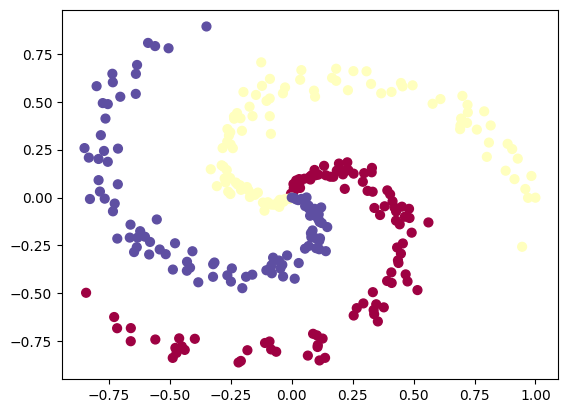

In [19]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()


In [20]:
# Neural Network that can be well fitted to the Spiral Dataset

from sklearn.model_selection import train_test_split
import numpy as np


# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=3)
# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Build the model
model_spiral = models.Sequential([
    # First hidden layer
    layers.Dense(8, activation='relu', input_shape=(2,)),
    # Second hidden layer
    layers.Dense(7, activation='relu'),
    # Third hidden layer
    layers.Dense(4, activation='relu'),
    # Output layer
    layers.Dense(1, activation='sigmoid')
])
# Compile the model
model_spiral.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model_spiral.summary()

model_spiral.fit(X_train, y_train, batch_size=16, epochs=20)


model_spiral.evaluate(scaler.transform(X_test), y_test)
# returns [loss, metrics]


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 8)                 24        
                                                                 
 dense_34 (Dense)            (None, 7)                 63        
                                                                 
 dense_35 (Dense)            (None, 4)                 32        
                                                                 
 dense_36 (Dense)            (None, 1)                 5         
                                                                 
Total params: 124 (496.00 Byte)
Trainable params: 124 (496.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
15/15 [==============================] - 2s 6ms/step - loss: 0.8591 - accuracy: 0.3289
Epoch 2/20
15/15 [==============================]

[0.4064905643463135, 0.3333333432674408]

### (7) How Deep should a Neural Network be ?

👀 If you compare the number of parameters needed to fit the Spiral Dataset vs. the XOR dataset, the former requires many more weights....

😃 Actually, if your models are deep enough, you could potentially fit pretty much any pattern...

---

<details>
    <summary><i>Should I create Very Deep Neural Networks? </i></summary>
        
<u>Examples:</u>
    
* Think about a human being. The more this person spends time coding in Python, the better he/she will get better at it!
    
* Think about a student. The more this person studies, the better he/she will pass exams. But sometimes students can study "too much" about a topic and forget about the global picture of a course....
    
<u>Lessons</u>
    
🧠 For Deep Learning Models, the more layers they have, the more opportunities they will have to learn the patterns in the data...

❗️ The problem is about avoiding **overfitting** ❗️
    
☠️ Add a good deal of noise and you _may_ see that your model will have learned "too much" about this noise.
  
    
📆 The next lecture **Deep Learning > Optimizers, Loss, & Fitting** is dedicated to helping you understand which techniques we can use to prevent Deep Learning models from overfitting.

</details>

---

<details>
    <summary><i>A picture of overfitting in Playground</i></summary>
    
<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/playground-overfitting.png' width=700 style='margin:auto'>
</details>

---

## Regression in Deep Learning

<u>Let's try to complete a Regression Task using Deep Learning</u>


This time, the last layer will no longer look like:  
```python
model.add(layers.Dense(1, activation='sigmoid'))
```

but instead  :
```python
model.add(layers.Dense(1, activation='linear'))
```

This means that the output of this network is no longer between $0$ and $1$ (probability) but between $ -\infty$ and $+ \infty$.

❓ <u>Playing with the Regression Dataset</u> ❓

* On Playground:
    - Change the dataset to the "Regression".
    - Try to design a model that has a very small **test loss**
        - Note: you are free to choose both the number of layers and the number of neurons per layer yourself
        
* Coding with Tensorflow/Keras:
    - Once you have built your model on Playground, code it down  below with the Tensorflow/Keras library

In [17]:
# Neural Network that can be well fitted to the Regression Dataset

import numpy as np
from sklearn.model_selection import train_test_split

# Number of samples in the dataset
num_samples = 1000

# Generate random x and y coordinates for the entire dataset
x = np.random.uniform(-1, 1, num_samples)
y = np.random.uniform(-1, 1, num_samples)

# Combine x and y into a single array
data = np.column_stack((x, y))

# Generate target values with a Gaussian distribution
targets = np.exp(-np.square(x) - np.square(y))

# Split the data into training and testing sets (80% train, 20% test)
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.2)

#################################
import tensorflow as tf
from tensorflow.keras import layers, models

model3 = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,)),  # 2 input features (x, y)
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')  # Single output neuron for regression
])

model3.compile(optimizer='adam', loss='mean_squared_error')

# Display the model's architecture
model3.summary()

model3.fit(train_data, train_targets, epochs=10, batch_size=32)

test_loss = model3.evaluate(test_data, test_targets)

print("Test Loss:", test_loss)


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                192       
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4417 (17.25 KB)
Trainable params: 4417 (17.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
25/25 [==============================] - 1s 4ms/step - loss: 0.1639
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1011
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0717
Epoch 4/10
25/25 [============================

🏁 You are now ready to do the same things with Tensorflow's Keras directly!

💪 This was a Warm-Up about Neural Networks / Deep Learning Models... (even if, admittedly, our networks in this challenge were not so "deep").


💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!